# Multi-class Classification

### Using Logistic Regression
### One-vs-all Classification

In [1]:
%matplotlib inline

import numpy as np
import collections
import matplotlib.pyplot as plt

In [2]:
def showExamples(img, y=None):
    """
    Shows some examples from image dataset with classes/labels (if given).
    
        Parameters:
            img (numpy array): 400 x m array of images (m 20x20 images)
            y (numpy array)  : 1 x m array of classes/labels corresponding to each image
        Returns:
            None
    """
    m = img.shape[1]    # Number of images
    idx_ary = np.random.randint(0, m, (10,10))
    _, ax_ary = plt.subplots(10, 10, figsize=(12, 12))
    for i in range(10):
        for j in range(10):
            idx = idx_ary[i,j]
            x_eg = img[:,idx].reshape((20,-1),order='F')
            ax_ary[i,j].imshow(x_eg, cmap='gray_r')
            
            if y is not None:
                y_eg = int(y[:,idx].squeeze())
                ax_ary[i,j].set_title(str(y_eg))
            
            ax_ary[i,j].axis('off')

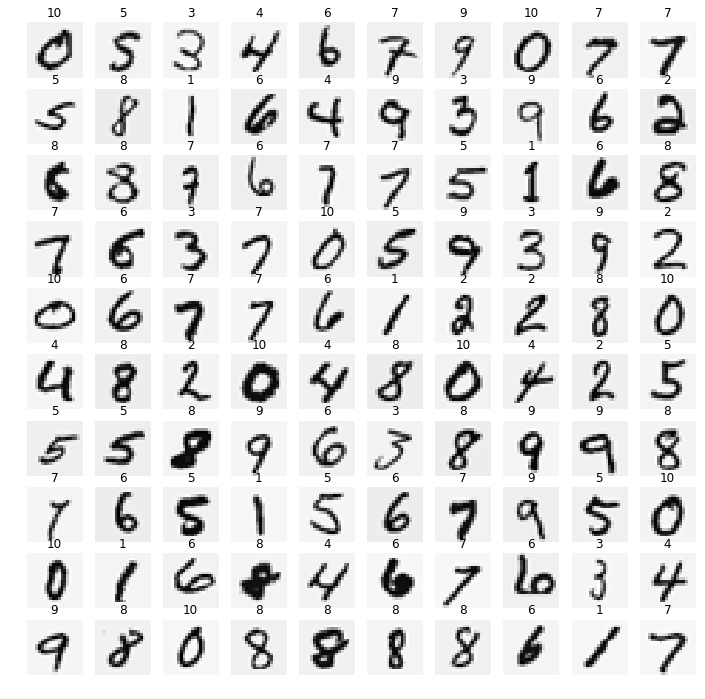

In [3]:
# Load and preprocess data
data = np.genfromtxt('mnist_subset.csv', delimiter=',')
m, n = data.shape

# Shuffle data
np.random.shuffle(data)

X = (data[:,0:-1].T).reshape((n-1,m))
y = data[:,-1].reshape((1,m))

# View some examples
showExamples(X, y)

In [4]:
# Number of examples of each class
print(collections.Counter(y.squeeze()))

Counter({7.0: 500, 8.0: 500, 4.0: 500, 3.0: 500, 1.0: 500, 5.0: 500, 2.0: 500, 6.0: 500, 10.0: 500, 9.0: 500})


In [5]:
def sigmoid(z):
    """
    Calculates element-wise sigmoid of given input array
    
        Parameters:
            z (numpy array)    : r x c input array
        Returns
            sigma (numpy array): Element-wise sigmoid r x c array  
    """
    sigma = 1/(1+np.exp(-z))
    return sigma

In [6]:
def computeCostReg(X, y, theta, lambd):
    '''
    Computes cost and estimated output for logistic regression with regularization.
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector with each element 0 or 1 
            theta (numpy array): n x 1 parameter column vector
            lambd (double)     : Regularization parameter (Hyperparameter)
        Returns:
            J (double)         : Cost
            y_hat (double)     : Estimated output
    '''
    m = y.shape[1]
    
    y_hat = sigmoid(np.dot(theta.T, X))
    J = 1/m*(-np.sum(np.log(y_hat[y==1]))-np.sum(np.log(1-y_hat[y==0]))) + lambd/(2*m)*np.sum(theta[1:])
    return (J, y_hat)

In [7]:
def gradientDescentReg(X, y, theta, lambd, alpha, max_iterations, epsilon):
    """
    Performs gradient descent for number of iterations
    
        Parameters:
            X (numpy array)     : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)     : 1 x m output row vector with each element 0 or 1
            theta (numpy array) : n x 1 parameter column vector
            lambd (float)       : Regularization parameter (Hyperparameter)
            alpha (float)       : Learning rate (Hyperparameter)
            max_iterations (int): Maximum no. of iterations
            epsilon (float)     : Convergence limit
        Returns:
            theta (numpy array) : Modified n x 1 parameter column vector
            J_iterations (list) : Cost over iterations 
    """
    m = y.shape[1]
    
    J_iterations = []
    J_prev = np.inf 
    for k in range(max_iterations):
        # Compute cost and estimated value
        J, y_hat = computeCostReg(X, y, theta, lambd)
        if J_prev-J < epsilon:
            break
        J_prev = J
        
        J_iterations.append(J)
        # Print cost every 1000 iteration
        if k % 1000 == 0:
            print("Iteration #{:,}".format(k), "| Cost:", J, end='\r')
        
        # Calculate gradients
        D_theta = 1/m * np.dot(X, (y_hat-y).T)
        D_theta[1:] = D_theta[1:] + lambd/m * theta[1:]
        
        # Update parameters
        theta = theta - alpha*D_theta
    print("Iteration #{:,}".format(k), "| Cost:", J)
    
    return (theta, J_iterations)

In [8]:
def oneVsAll(X, y, lambd, alpha, max_iterations=10_000, epsilon=1e-5):
    """
    Trains number of classes of logistic regression classfiers and returns parameters of all classifiers.
    
        Parameters:
            X (numpy array)     : n-1 x m array of inputs
            y (numpy array)     : 1 x m array of classes
            lambd (float)       : Regularization parameter (Hyperparameter)
            alpha (float)       : Learning rate (Hyperparameter)
            max_iterations (int): Maximum no. of iterations
            epsilon (float)     : Convergence limit
        Returns:
            thetas (numpy array): n x (number of classes) of parameters of number of classes of logistic regression classifiers
    """
    classes = np.unique(y)
    n_classes = classes.shape[0]
    
    # Append a row of ones for bias parameter
    X = np.append(np.ones((1,m)), X, axis=0)
    n = X.shape[0]
    
    thetas = np.empty([n, n_classes])
    plt_rows = 4
    plt_cols = n_classes%4+1
    plt.figure(figsize=(3*plt_rows, 3*plt_cols))
    for clas in classes:
        y_one = (y==clas)
        
        theta = np.zeros((n,1))
        
        # Run gradient descent for each class
        print("Running GD for Class:", int(clas), "...")
        theta, J_iterations = gradientDescentReg(X, y_one, theta, lambd, alpha, max_iterations, epsilon)
        
        # Plotting cost function
        plt.subplot(plt_rows, plt_cols, int(clas))
        plt.plot(J_iterations)
        
        thetas[:, int(clas-1)] = theta.squeeze()
    
    return thetas

Running GD for Class: 1 ...
Iteration #24,458 | Cost: -0.032826264158208856
Running GD for Class: 2 ...
Iteration #21,427 | Cost: 0.08117698008132314
Running GD for Class: 3 ...
Iteration #19,773 | Cost: 0.07755981188903668
Running GD for Class: 4 ...
Iteration #27,944 | Cost: 0.029560121979899906
Running GD for Class: 5 ...
Iteration #30,910 | Cost: 0.08786829603709048
Running GD for Class: 6 ...
Iteration #20,099 | Cost: 0.020261475319567943
Running GD for Class: 7 ...
Iteration #20,967 | Cost: 0.030433336263991792
Running GD for Class: 8 ...
Iteration #24,790 | Cost: 0.12414036040416822
Running GD for Class: 9 ...
Iteration #26,755 | Cost: 0.08040084559740373
Running GD for Class: 10 ...
Iteration #20,885 | Cost: 0.017809949080949253
Wall time: 14min 17s


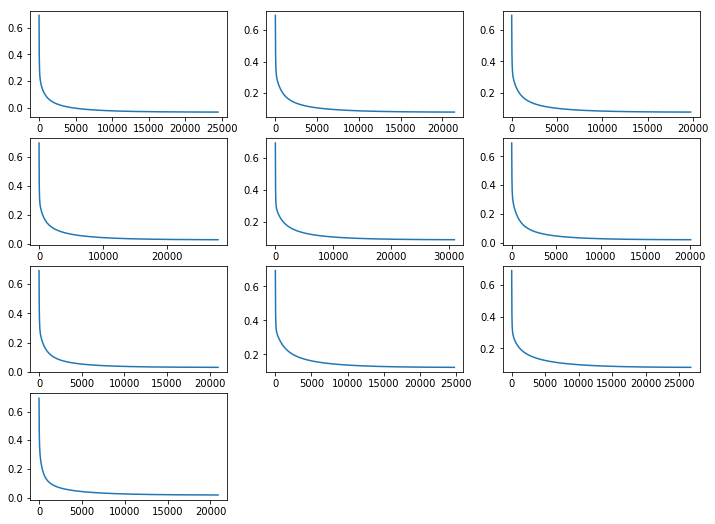

In [9]:
%%time

# Set hyperparameters
lambd = 50
alpha = 0.005

# Train all classifiers 
thetas = oneVsAll(X, y, lambd, alpha, max_iterations=100_000, epsilon=1e-7)

In [10]:
def predictClass(X, thetas):
    """
    Predicts class of given input
    
        Parameters:
            X (numpy array)     : n-1 x m array of inputs
            theta (numpy array) : n x (number of classes) of parameters
        Returns:
            y_pred (numpy array): 1 x m array of predicted classes
            y_prob (numpy array): 1 x m array of probabilities of prediced classes
    """
    m = X.shape[1]
    
    # Append a row of ones for bias parameter
    X = np.append(np.ones((1,m)), X, axis=0)
    
    y_hat = sigmoid(np.dot(thetas.T, X))
    y_pred = np.argmax(y_hat, axis=0).reshape(1,m) + 1
    y_prob = np.max(y_hat, axis=0).reshape(1,m)
    
    return (y_pred, y_prob)

In [11]:
# Predicti for training examples
y_pred, y_prob = predictClass(X, thetas)

m = y_pred.shape[1]
# Calculate training set accuracy 
accuracy = np.sum(y_pred == y)/m * 100
print("Accuracy:", accuracy, '%')

Accuracy: 89.3 %


Number of wrong classifications: 535


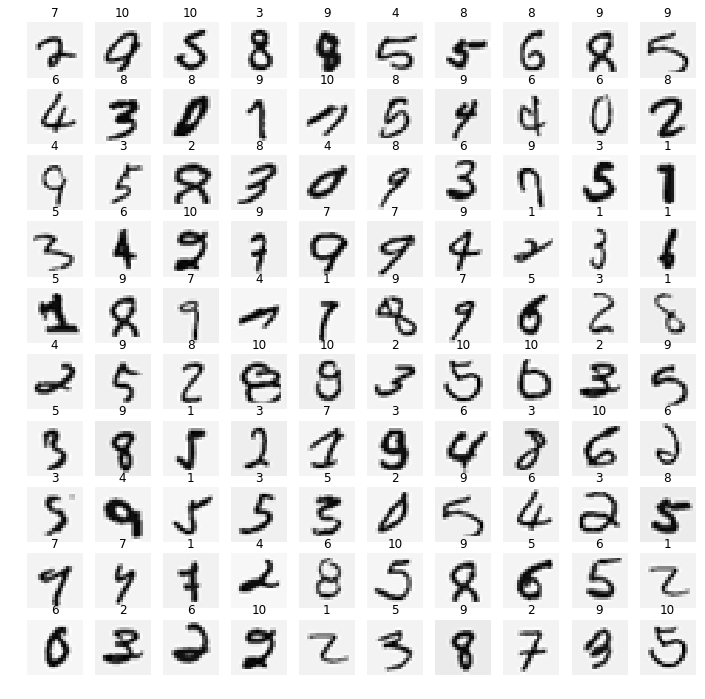

In [12]:
y_wrong = (y_pred != y) 
print("Number of wrong classifications:", np.sum(y_wrong))
# Show wrong classifications
showExamples(X[:,y_wrong.squeeze()], y_pred[:,y_wrong.squeeze()])